# Beyond Diversification

Diversificação:
- Elimina risco não remunerado (retorno por unidade de risco)

Mas:
- Diversificação falha quando você mais precisa, nas crises
- Por definição, não dá pra diversificar risco sistêmico

Diversificação vs Heding:
- Hedge deixa passivo na mesma 'moeda' que ativos
- Mas no final, perde de um lado e ganha do outro

## Insurance -> Dynamic Hedging
Get downside protection while allowing for upside potential

Exemplo do carro:
Uma estrada com retas e curvas, se eu tivesse que ir sempre a uma velocidade, provavelmente teria problemas (ou demoraria muito, ou na hora da curva poderia bater o carro). O que fazemos é escolher uma velocidade apropriada para cada momento, se tiver reto, vai rapido, se tiver com curvas, vai devagar. Assim é o dynamic hedging

Como ajustar a margem de erro pelo risco que estou disposto a incorrer?

### Lab: o que acontece com a correlação entre os ativos quando o mercado como um todo sofre uma queda?

In [124]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import pandas as pd
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ind_return = erk.get_ind_returns()

A tabela com dados das industrias usada anteriormente tem traz para todos os tipos (Food, Beer, etc) os retornos considerando o market capital das industrias.

Market capital das indústrias é calculado multiplicando a quantidade de ações no mercado pelo preço delas ao longo dos períodos.

Essa métrica é ponderada pelo tamanho que os mercados tem e pela liquidez (float adjustment)

In [3]:
# vamos usar dados do tamanho do mercado: numeros de firmas e
# tamanho médio de uma empreas do mercado

ind_size = erk.get_ind_size() # tamanho (valor) médio de uma empresa
                              # do ramo
ind_nfirms = erk.get_ind_nfirms()

In [4]:
ind_return.shape

(1110, 30)

In [5]:
ind_size.shape

(1110, 30)

In [6]:
ind_nfirms.shape

(1110, 30)

In [7]:
ind_return.head()

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals     Fin   Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [8]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

In [9]:
# axis = columns soma valores das linhas
total_mkt_cap = ind_mktcap.sum(axis='columns')

<AxesSubplot:>

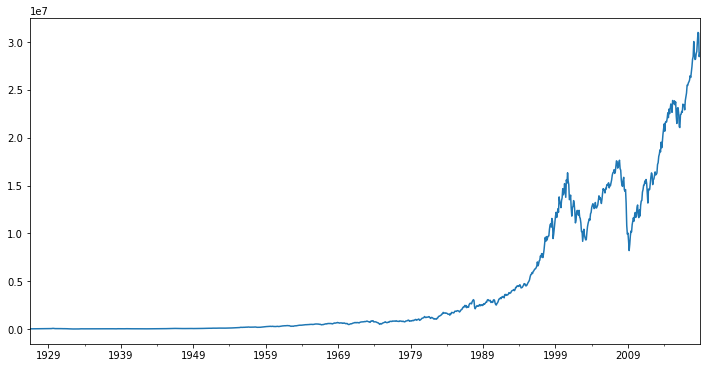

In [10]:
total_mkt_cap.plot(figsize = (12,6))

In [11]:
ind_capweight = ind_mktcap.divide(total_mkt_cap, axis='rows')

In [12]:
ind_capweight
# em julho de 1926, food era correspondia a 5.8% de todo 
# o mercado de capitais

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
1926-07  0.058037  0.000801  0.035844  0.006935  0.000902  0.006683  0.008265   
1926-08  0.056578  0.000738  0.035264  0.006932  0.000972  0.006453  0.008673   
1926-09  0.056699  0.000917  0.036510  0.006810  0.001046  0.006038  0.008249   
1926-10  0.056920  0.000954  0.036736  0.007175  0.001028  0.006053  0.008139   
1926-11  0.056725  0.000951  0.038285  0.007047  0.001161  0.005924  0.008396   
...           ...       ...       ...       ...       ...       ...       ...   
2018-08  0.021873  0.008309  0.008222  0.011997  0.001168  0.014569  0.009720   
2018-09  0.021005  0.007873  0.007515  0.011923  0.001076  0.014427  0.009874   
2018-10  0.020661  0.007862  0.007831  0.011851  0.001052  0.014606  0.010000   
2018-11  0.022649  0.008403  0.009178  0.010810  0.001066  0.015702  0.009761   
2018-12  0.022832  0.008763  0.008291  0.010589  0.001083  0.016477  0.009510   

             Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
1926-07  0.006701  0.036726  0.003014  ...  0.065714  0.001531  0.014889   
1926-08  0.006583  0.038497  0.002938  ...  0.064380  0.001613  0.014732   
1926-09  0.006668  0.039700  0.003109  ...  0.064318  0.001609  0.014870   
1926-10  0.006704  0.041486  0.003160  ...  0.064896  0.001636  0.014850   
1926-11  0.006831  0.040665  0.003269  ...  0.066868  0.001642  0.015118   
...           ...       ...       ...  ...       ...       ...       ...   
2018-08  0.103549  0.017596  0.000616  ...  0.039896  0.161042  0.108402   
2018-09  0.104324  0.016954  0.000618  ...  0.039669  0.163597  0.114947   
2018-10  0.106363  0.014954  0.000580  ...  0.040434  0.163111  0.114711   
2018-11  0.105080  0.014176  0.000467  ...  0.043476  0.160187  0.114465   
2018-12  0.109930  0.014630  0.000474  ...  0.043953  0.159804  0.106189   

            Paper     Trans     Whlsl     Rtail     Meals       Fin     Other  
1926-07  0.007956  0.185736  0.000089  0.057748  0.002435  0.008476  0.003639  
1926-08  0.008280  0.183379  0.000066  0.056014  0.002406  0.008258  0.003719  
1926-09  0.007873  0.187292  0.000068  0.054227  0.002339  0.008412  0.003879  
1926-10  0.007436  0.186812  0.000063  0.054280  0.002310  0.008280  0.003730  
1926-11  0.007236  0.187051  0.000054  0.054635  0.002279  0.008096  0.003521  
...           ...       ...       ...       ...       ...       ...       ...  
2018-08  0.010090  0.023453  0.010987  0.076225  0.014317  0.164637  0.047815  
2018-09  0.009675  0.023248  0.010992  0.080234  0.014275  0.162556  0.047549  
2018-10  0.009650  0.023535  0.010681  0.080886  0.014663  0.159464  0.048158  
2018-11  0.009333  0.023064  0.010674  0.078849  0.015642  0.161024  0.049159  
2018-12  0.009919  0.023915  0.010849  0.077102  0.016251  0.163053  0.050073  

[1110 rows x 30 columns]

In [13]:
ind_capweight.loc['1926'].sum(axis='columns')

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

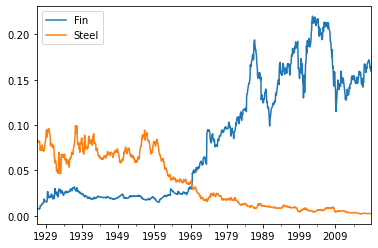

In [14]:
ind_capweight[['Fin', 'Steel']].plot()

No passado, steel industry era quase 10% do mercado. Hoje em dia, perdeu espaço para mercado financeiro (20%)

SP500:
"It takes 500 stocks, the top 500 stocks, and then it computes a portfolio that consists of the prices of all those companies, or the values of all of those companies (p*q), proportional to their market capitalization."

Market capitalization: current market price/share*n_shares
Market capitalization: preço por ação * numero de ações

In [15]:
total_market_return = (ind_capweight*ind_return).sum(axis='columns')

<AxesSubplot:>

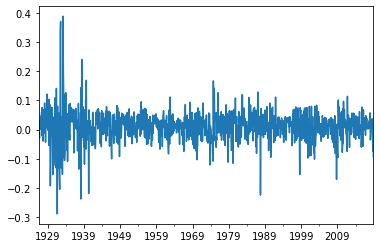

In [16]:
total_market_return.plot()

<AxesSubplot:title={'center':'Total Market CapWeighted Index'}>

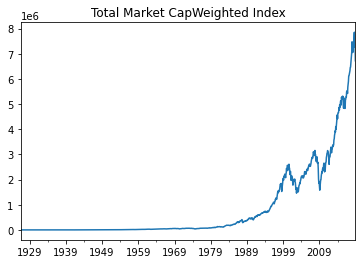

In [17]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(title='Total Market CapWeighted Index')

<AxesSubplot:>

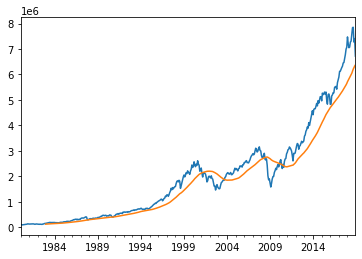

In [18]:
total_market_index.loc['1980':].plot()
# rolling window=36 + mean faz média móvel de 36 meses!
total_market_index.loc['1980':].rolling(window=36).mean().plot()

<AxesSubplot:>

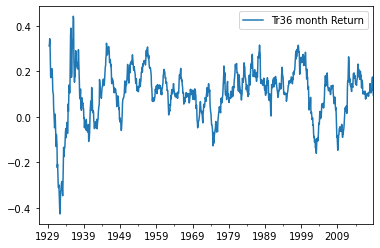

In [19]:
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets)
tmi_tr36rets.plot(label='Tr36 month Return', legend=True)

# total_market_return.plot(label='Total Market Return', legend=

Queremos entender: quando o mercado caí como um todo (média movel de 36 meses, por ex.), o que será que acontece com a correlação entre os ativos?
- Estão ficando mais correlacionados?
- Estão ficando menos correlacionados?

Existe alguma relação entre retornos e correlação?


## Rolling Correlation - along with MultiIndexes and .groupby

In [20]:
# time series of correlations
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

# como correlação é uma matriz quadrada, 
# será que consigo fazer uma série 
# temporal de tabelas?

# veja que o pandas retorna estranho, matriz
# de correlação deveria ser quadrada 

# repare ainda no MultiIndex dessa tabela

# Lembre-se: matriz de correlação varia de 0 a 1

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [21]:
ts_corr.index.names

FrozenList([None, None])

In [22]:
ts_corr.index.names = ['date', 'industries']

In [23]:
# para fazer a série temporal, agregar por date
# level é multiindex, aplicando média das correlações
ind_trcorr = ts_corr.groupby(level='date').apply(lambda 
                                    comat: comat.values.mean())

<AxesSubplot:xlabel='date'>

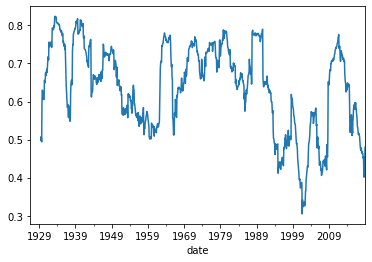

In [24]:
ind_trcorr.plot()

<AxesSubplot:xlabel='date'>

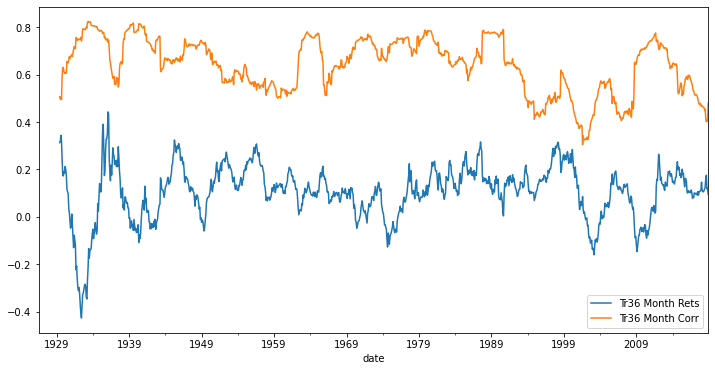

In [25]:
tmi_tr36rets.plot(label='Tr36 Month Rets',figsize=(12,6), legend=True)
ind_trcorr.plot(label='Tr36 Month Corr', legend=True)


Observe que a correlação entre os ativos aumenta quando o mercado cai, e diminui quando mercado sobre!!!!!

<AxesSubplot:>

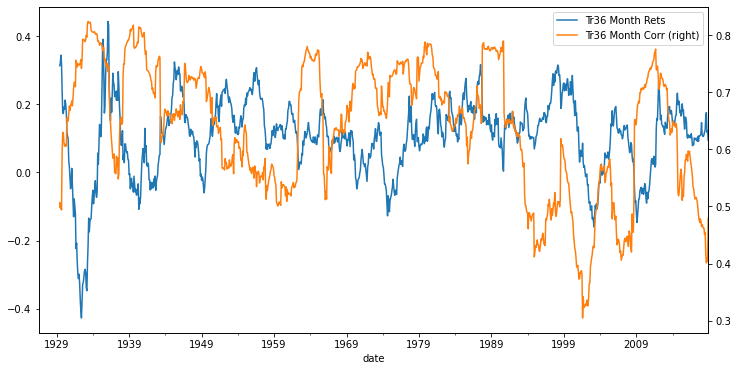

In [26]:
# Como retorno e correlação tem 'unidades' diferentes,
# podemos acrescentar um eixo y no grafico:

tmi_tr36rets.plot(label='Tr36 Month Rets', figsize=(12,6),
                  legend=True)
ind_trcorr.plot(label='Tr36 Month Corr', secondary_y=True,
                legend=True)

<AxesSubplot:>

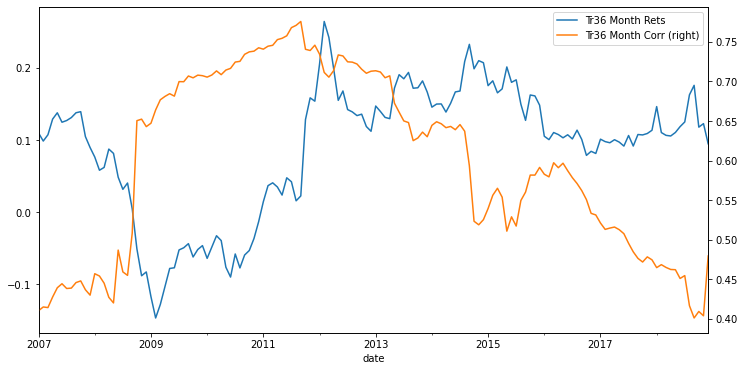

In [27]:
# vamos dar um zoom
tmi_tr36rets.loc['2007':].plot(label='Tr36 Month Rets', figsize=(12,6),
                  legend=True)
ind_trcorr.loc['2007':].plot(label='Tr36 Month Corr', secondary_y=True,
                legend=True)

In [28]:
# Qual é a correlação entre o retorno médio dos ativos
# e a correlação média entre eles?
tmi_tr36rets.corr(ind_trcorr)

# correlação negativa, enquanto uma sobe, a outra desce.
# quando os retornos médios sobem, a correlação diminui


-0.2801006506288401

Diversificação não te ajuda quando mercado está caindo, pq correlação entre ativos fica alta!

# Introduction to CPPI - Constant Portifolio Proportion Insurance

Nos ativos de risco, colocar um múltiplo (M) da diferença entre o valor de um ativo e um piso. 

Asset values -> wealth level

Piso -> valor mínimo que aceita ter 

Essa estratégia funciona bem quando trade é feito constantemente, atualizando a diferença entre o valor do ativo e o valor mínimo que o investidor não quer perder. 
Para longos períodos entre os trades, ativos de risco podem ir abaixo do limite.

- Gap Risk: quando o trade não é feito constantemente

Acontece quando a perda em portifólio de risco em relação ao portifólio livre de risco excede 1/M

CPPI promove Downside protection, sem que você tenha que investir em opções (derivativos)

## Extensions to CPPI
### Maximum Drawdown Constraints

Max DD Constraints:
$$  V_t > \alpha M_t  $$

V: valor do portifólio no instante t

Mt: Valor máximo do porfiólio entre instante 0 e t

1-alpha = máximo drawdown aceitável

In [29]:
from IPython import display

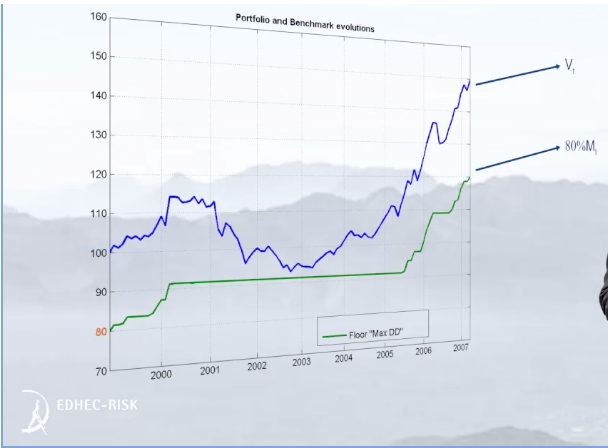

In [30]:
display.Image('pics/Captura de tela de 2022-09-27 17-45-53.png')

Agora usaremos também um Cap, o valor máximo de riqueza que investidor quer proteger. Para isso, cria-se um Threshold. Isso gera um ganho de oportunidade que paga ou supera o custo de oportunidade da proteção de queda.

**Threshold** é a média entre Floor e Cap

$$   F_t \le A_t \le T_t \implies E_t = m(A_t-F_t)   $$
$$   T_t \le A_t \le C_t \implies E_t = m(C_t-A_t)   $$ 

Se o valor do ativo tiver entre Floor e Threshold, a alocação no ativo de risco deve ser um múltiplo da diferença entre o preço do ativo e o floor (exatamente como o CPPI)

Mas se estou acima do floor, não me preocupo tanto em atingi-lo, mas sim de não ultrapassar certo limite. Logo, se valor do ativo tiver acima do Threshold e abaixo do Cap, a alocação do ativo será o mulitiplicado * a diferença entre o Cap e o valor do ativo

O multiplicador suaviza a saída do floor e a chegada no cap

### Implementando CPPI

In [31]:
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

In [32]:
risky_r = ind_return.loc['2000':][['Steel','Fin', 'Beer']]

In [33]:
# vamos construir um data frame para ativos
# livres de risco, com mesmo tamanho dos
# ativos de risco

risky_r.shape

(228, 3)

In [34]:
safe_r = pd.DataFrame().reindex_like(risky_r)

In [35]:
safe_r[:] = 0.03/12

In [36]:
safe_r

Steel     Fin    Beer
2000-01  0.0025  0.0025  0.0025
2000-02  0.0025  0.0025  0.0025
2000-03  0.0025  0.0025  0.0025
2000-04  0.0025  0.0025  0.0025
2000-05  0.0025  0.0025  0.0025
...         ...     ...     ...
2018-08  0.0025  0.0025  0.0025
2018-09  0.0025  0.0025  0.0025
2018-10  0.0025  0.0025  0.0025
2018-11  0.0025  0.0025  0.0025
2018-12  0.0025  0.0025  0.0025

[228 rows x 3 columns]

In [37]:
# tabelona com retornos anual próximo de 3% ao ano (divide por 12
# para dar retorno mensal)

safe_r[:] = 0.03/12 # jeito mais rápido de preencher tudo com um numero

# backteste
start = 1000
floor = 0.8 # fração do parâmetro de start


1. Compute cushion -> Asset Value - Floor
2. Compute an Allocation to Safe and Risky Assets -> m * risk budget
3. Recompute the Asset Value based on the returns

Nesse momento do curso, o professor diz que evitamos usar loopings quando usamos pandas e numpy pois é ineficiente.

In [38]:
def compound1(r):
    return (1+r).prod()-1

def compound2(r):
    return np.exp(np.log(1+r).sum())-1 # usando log(1+r), algoritimo
                                       # irá criar um novo array e
                                       # somar 1 em cada elemento (loop)
def compound3(r):
    return np.expm1(np.log1p(r).sum()) # usando log 1 plus (r) e
                                       # e np minus 1, o loop é
                                       # otimizado


In [39]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [40]:
compound2(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [41]:
compound3(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [42]:
%timeit compound1(risky_r)

738 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit compound2(risky_r)

1.06 ms ± 26.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%timeit compound3(risky_r)

808 µs ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Fim da discussão sobre for loops

In [45]:
# dates = por onde vou iterar
dates = risky_r.index

# numero de passos
n_steps = len(dates)

account_value = start
floor_value = start*floor
m = 3

# declarando variáveis que vou querer observar 
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value-floor_value)/account_value # 1. percentual
    risky_w = m*cushion # 2.
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0) # não deixa ser <0
    safe_w = 1 - risky_w # 3.
    # se, por exemplo, cushion percentual for de 40%,
    # e m for 4, risky_weight = 120%, o que significa
    # que tenho que me alavancar (investir com dinheiro
    # empresatado)
    # por isso implementamos uma limitação de alavancagem:
    risky_alloc = account_value*risky_w # em termos monetários
    safe_alloc = account_value*safe_w # em termos monetários
    # update the account value for this time step -> ativos renderam
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step]) # iloc acha por indices inteiros
    # save the values so we can look at the history and plot it
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    

<AxesSubplot:>

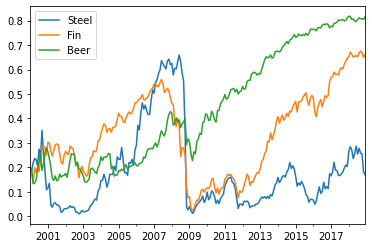

In [46]:
cushion_history.plot()

<AxesSubplot:>

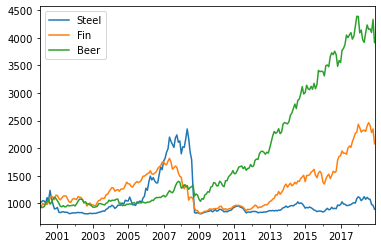

In [47]:
account_history.plot()

<AxesSubplot:>

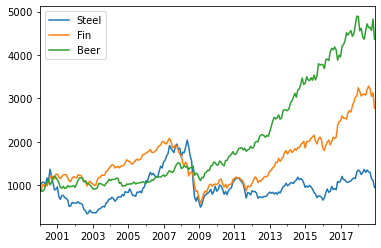

In [48]:
risky_wealth = start*(1+risky_r).cumprod() # se eu só tivesse colocado meu
                                        # dinheiro, sem CPPI
risky_wealth.plot()

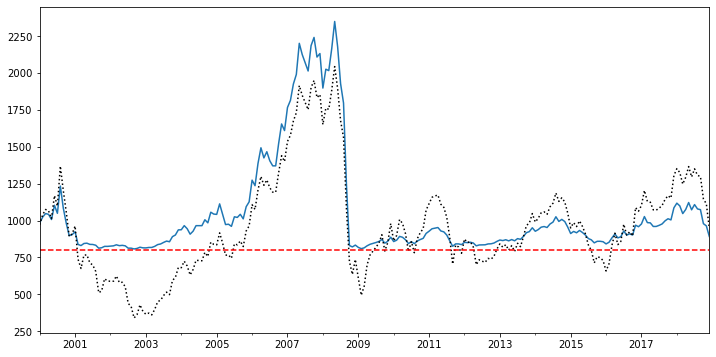

In [49]:
ax = account_history['Steel'].plot(figsize=(12,6))
risky_wealth['Steel'].plot(ax=ax, style='k:') # ax = ax pra plotar no
                                             # eixo que tinhamos 
                                             # estabelecido.
                                             # k: means black and with
                                             # dots
ax.axhline(y=floor_value, color='r', linestyle='--')
# desenha linha horinzontal

<AxesSubplot:>

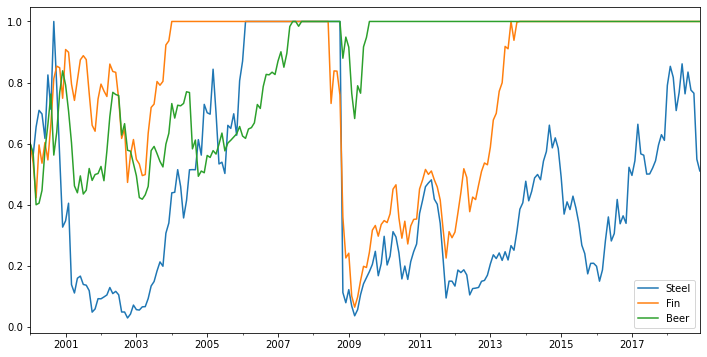

In [50]:
risky_w_history.plot(figsize=(12,6))

Olhando para esses dois gráficos acima, vemos que, antes de 2007 (quando o peso do ativo 'Beer' não era 1), a linha azul do primeiro gráfico variou menos que a linha preta. Isso porque o ativo livre de risco também compunha essa carteira 

Faz sentido que a linha vermelha mantida constante no primeiro gráfico seja atualizada, pois em um dado momento, o ganho foi tanto que fica muito improvável ficar abaixo desse _floor_

Podemos usar Drawdown para atualizar esse floor

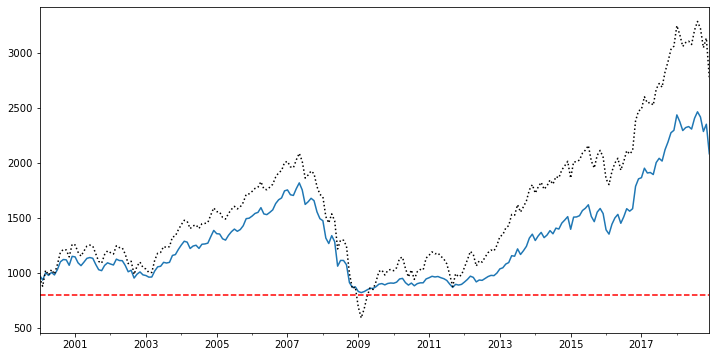

In [51]:
ind = 'Fin'
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:') 
ax.axhline(y=floor_value, color='r', linestyle='--')

Veja como durante a crise de de 2008 a linha azul não ultrapassa o limite


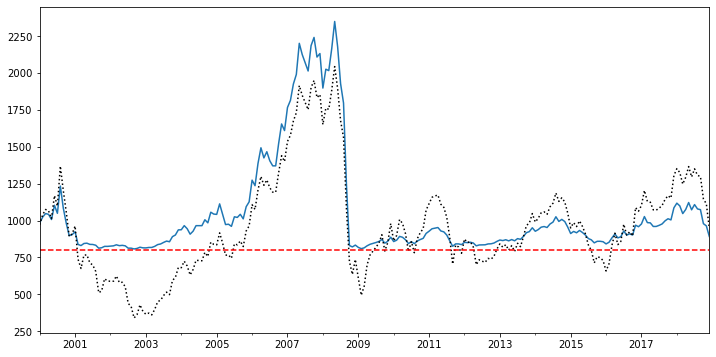

In [52]:
ind = 'Steel'
ax = account_history[ind].plot(figsize=(12,6))
risky_wealth[ind].plot(ax=ax, style='k:') 
ax.axhline(y=floor_value, color='r', linestyle='--')

In [53]:
erk.summary_stats(risky_r)

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.002790        0.312368 -0.326334  4.144381   
Fin             0.055166        0.192909 -0.533218  4.995534   
Beer            0.080598        0.138925 -0.493545  4.173881   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.150139            0.208117     -0.102567     -0.758017  
Fin                   0.091224            0.132175      0.126718     -0.718465  
Beer                  0.063015            0.091442      0.354314     -0.271368

In [54]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness   Kurtosis  \
Steel          -0.005167        0.174180 -1.995143  17.110190   
Fin             0.040894        0.131678 -0.946504   6.051414   
Beer            0.075544        0.115462 -0.669250   4.760879   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.091995            0.130153     -0.196750     -0.655198  
Fin                   0.065535            0.091621      0.080352     -0.549673  
Beer                  0.052923            0.074908      0.383772     -0.259582

Veja como CPPI melhora Max Drawdown

**CPPI é eficiente contra downside risk**

In [55]:
btr['Wealth'].pct_change()

Steel       Fin      Beer
2000-01       NaN       NaN       NaN
2000-02  0.039530 -0.044447 -0.065175
2000-03  0.023710  0.071974  0.002020
2000-04 -0.005228 -0.024304  0.016390
2000-05 -0.033530  0.028270  0.054417
...           ...       ...       ...
2018-08 -0.026534  0.024500 -0.018600
2018-09 -0.004633 -0.019300  0.001900
2018-10 -0.088219 -0.054500 -0.015700
2018-11 -0.015332  0.028900  0.057900
2018-12 -0.074228 -0.114400 -0.096900

[228 rows x 3 columns]

<AxesSubplot:>

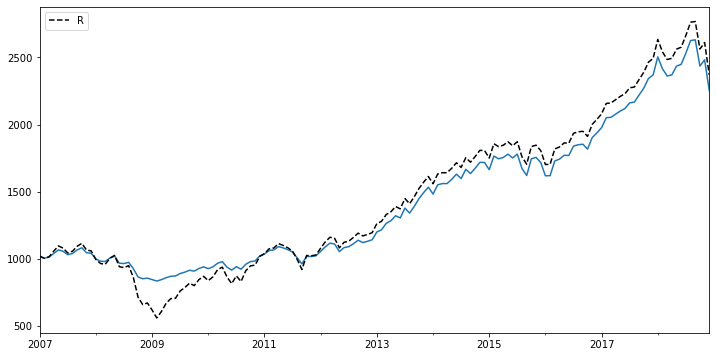

In [57]:
btr = erk.run_cppi(tmi_return['2007':])
ax = btr['Wealth'].plot(figsize=(12,6), legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--')

In [58]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
R           0.073411        0.150463 -0.734939  4.523488   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
R                 0.071592            0.096315      0.280618     -0.499943

In [59]:
erk.summary_stats(btr['Wealth'].pct_change().dropna()) # CPPI Wealth

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
R           0.069416        0.100381 -0.588292  3.740932   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
R                 0.045678            0.062953      0.382052     -0.229683

Total market risky wealth tem drawdown bem maior que CPPI

# Perri

In [60]:
# dates = por onde vou iterar
dates = risky_r.index

# numero de passos
n_steps = len(dates)
floor = 0.8
account_value = start
floor_value = start*floor
m = 3
dyn = floor_value

# declarando variáveis que vou querer observar 
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)
dynamic_floor_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value-dyn)/account_value # 1. percentual
    risky_w = m*cushion # 2.
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0) # não deixa ser <0
    safe_w = 1 - risky_w # 3.
    # se, por exemplo, cushion percentual for de 40%,
    # e m for 4, risky_weight = 120%, o que significa
    # que tenho que me alavancar (investir com dinheiro
    # empresatado)
    # por isso implementamos uma limitação de alavancagem:
    risky_alloc = account_value*risky_w # em termos monetários
    safe_alloc = account_value*safe_w # em termos monetários
    # update the account value for this time step -> ativos renderam
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step]) # iloc acha por indices inteiros
#     break
    ### lista do perri
    dyn = account_value*floor
    ### fim lista do perri
    
    # save the values so we can look at the history and plot it
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    dynamic_floor_history.iloc[step] = dyn

    


# Drawdown Constraint

In [61]:
btr = erk.run_cppi(ind_return['2007':][['Steel', 'Fin', 'Beer']], drawdown=0.25)
# repare como coloca doble brackets [[]]

<AxesSubplot:>

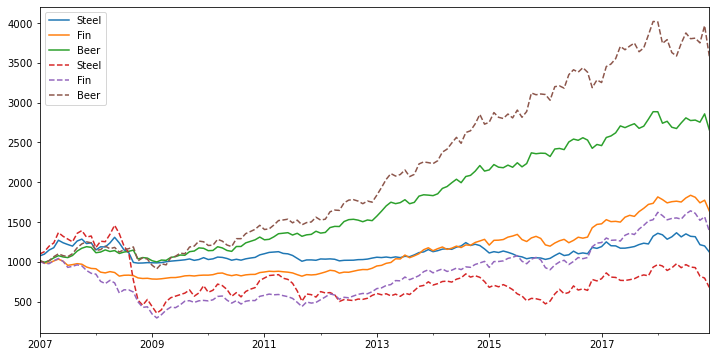

In [62]:
ax = btr['Wealth'].plot(figsize=(12,6))
btr['Risky Wealth'].plot(ax=ax, style='--')

In [63]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.039660        0.306407 -0.459951  4.782828   
Fin             0.027364        0.212204 -0.695200  4.621401   
Beer            0.111554        0.127971 -0.670797  4.650878   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.152288            0.203837     -0.221642     -0.758017  
Fin                   0.105744            0.149862     -0.012370     -0.718465  
Beer                  0.056497            0.077388      0.620132     -0.271368

In [64]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel           0.003784        0.097073 -0.441089  5.220481   
Fin             0.041975        0.085028 -0.355163  4.153860   
Beer            0.084375        0.086263 -0.744111  4.571533   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.047371            0.066991     -0.262958     -0.248059  
Fin                   0.038342            0.054111      0.136964     -0.243626  
Beer                  0.037937            0.051189      0.613413     -0.161186

In [65]:
btr['Wealth'].loc['2018-12'].sum() # comparando riqueza final

5421.996265937263

In [66]:
btr['Risky Wealth'].loc['2018-12'].sum()

5648.380478477628

# A stochastic model for asset returns

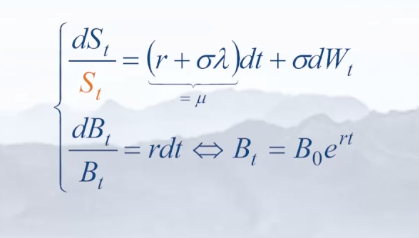

In [67]:
display.Image('pics/Captura de tela de 2022-09-30 20-31-50.png')

S é o risky stock e B é Treasure Bond.r é riskfree_rate. sigma é volatilidade, lambda é sharp_ratio

(r + sigma*lambda) é a média (retorno esperado) 
repare que retorno esperado pode ser visto como a taxa livre de risco + volatilidade*sharp_ratio.

(sigma*d*W_t) é o componente estocástico random walk in continuous time -> standard Brownian Motion Process



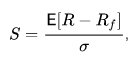

In [68]:
display.Image('pics/Captura de tela de 2022-09-30 20-39-52.png')

# lembre-se do indice de Sharpe (relação recompensa-variabilidade): 

### Brownian Motion


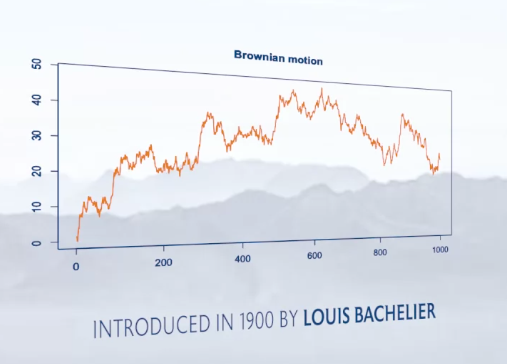

In [69]:

display.Image('pics/Captura de tela de 2022-09-30 20-45-08.png')

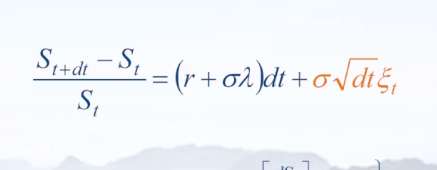

In [70]:
display.Image('pics/Captura de tela de 2022-09-30 20-47-25.png')

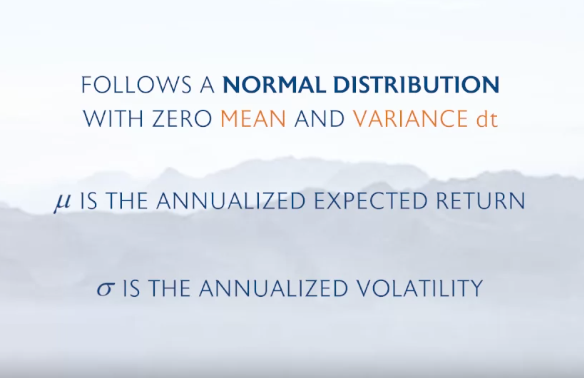

In [71]:
display.Image('pics/Captura de tela de 2022-09-30 20-48-33.png')

Temos a fórmula:
$$   \frac{dS_t}{S_t} = (r +\sigma \lambda) +\sigma d W_t^S    $$

Mas precisamos considerar que volatilidade e índice de sharpe (lambda) variam com o tempo

Podemos generalizar o modelo considerando o processo estocastico dos parâmetros (ret, vol e lambda):

$$   dr_1 = a(b-r_t)dt + \sigma_rdW_t^r   $$

componente determinístico (mean reverting feature): b é o retorno médio de longo prazo, e a é a velocidade do mean reversion

se b - retorno for positivo, a tendência é que esse preço convirja para a média de longo prazo, a uma taxa 'a' 

da mesma forma:

$$   dV_t = \alpha(\overline V - V_t)dt + \sigma_V \sqrt V_t dW_t^V   $$

aqui, adiciona-se o componente RAIZ_V(t) pra não deixar isso ir abaixo de 0 (variância é desvio padrão ao quadrado)

# Random Walk Generation

$$   \frac{S_{t+dt} - S_t} {S_t} = \mu dt + \sigma \sqrt dt \xi   $$


In [112]:
# gbm = geometric bound motion
import numpy as np
import pandas as pd 

def gbm(n_year=10, n_scenarios=1000, mu=0.07, sigma=0.15,steps_per_year=12, s_0=100.0):
    """
    Dado um S_0 (valor inicial do ativo), mostra
    como ele vai variar ao longo do tempo (dt)
    usando geometric brownian motion model
    """

    dt = 1/steps_per_year # amount by wich I should change the time
    n_steps = int(n_year*steps_per_year) # how long do you wanna do this
                                          # int pra poder gerar indices pra grafico
    
    # falta computar componente de brownian motion
    # (simplemente somar um random_normal)
    xi = np.random.normal(size=(n_steps, n_scenarios)) # varios retornos em diferentes cenarios
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # rets to prices
    prices = s_0*(1+rets).cumprod()
    return (prices)

In [113]:
p = gbm(10, n_scenarios=3)

In [114]:
p.shape

(120, 3)

<AxesSubplot:>

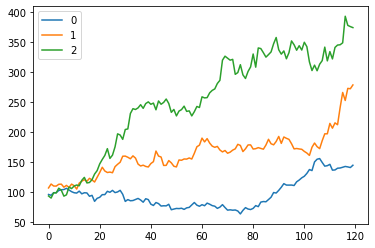

In [115]:
p.plot()

Diferença de cenarios possíveis!

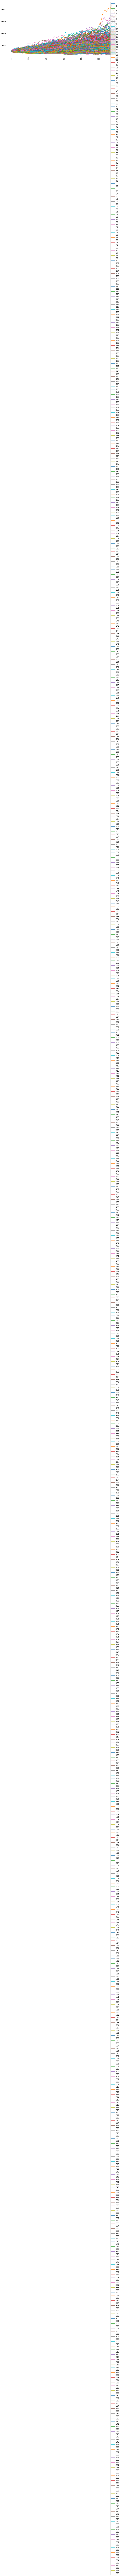

In [116]:
p = gbm(n_year=10, n_scenarios=1000).plot(figsize=(12,6))

Plotar essa figura demora muito.

Sem plotar:

In [117]:
p = gbm(n_year=10, n_scenarios=1000) # muito rápido

Depois de colocar no toolkit as diferentes formas de calcular o retorno com componente browniano, vamos ver a diferença que demoram pra computar:


In [127]:
%timeit erk.gbm0(n_year=10, n_scenarios=1000)

7.91 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
%timeit erk.gbm(n_year=10, n_scenarios=1000)

6.87 ms ± 82.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Por que diferença de tempo sempre dá menor do que do professor da EDHEC?

[]

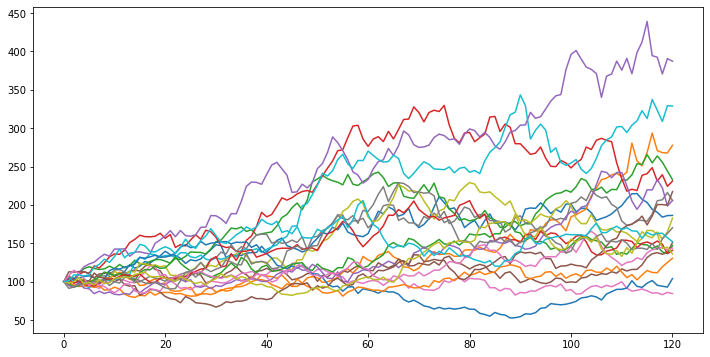

In [132]:
erk.gbm(n_year=10, n_scenarios=20).plot(legend=False,figsize=(12,6)).plot()

### Analyzing CPPI Strategies

É importante notar como mudanças nos parâmetros mu e sigma geram diferentes cenários.

Um valor alto de mu significará, na média, um aumento de patrimônio. 

Se sigma for alto e mu alto, possivelmente algum cenário (alguma ação) vai crescer vertiginosamente.

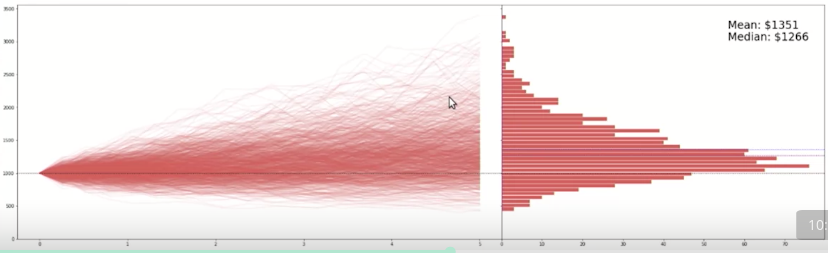

In [133]:
display.Image('pics/Captura de tela de 2022-10-05 13-56-04.png')

Olha que imagem interessante. O gráfico da esquerda mostra os possíveis stock prices (de S0=1000), dado um mu e um desvio padrão. À direita tem um histograma desses resultados

Agora, o professor coloca CPPI constraints (floor)

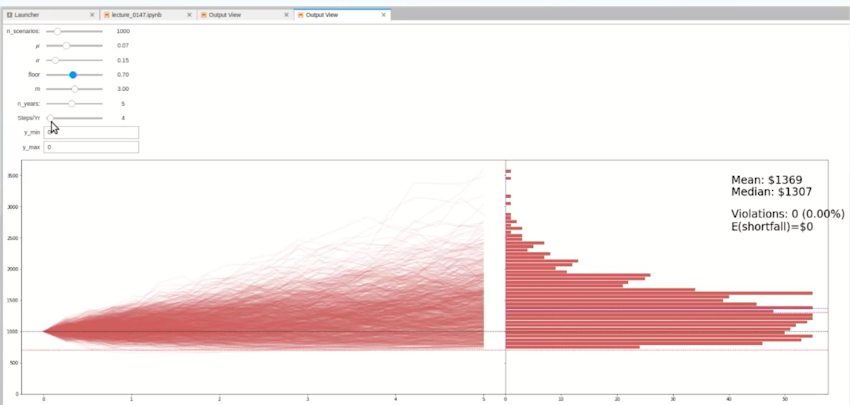

In [134]:
display.Image('pics/Captura de tela de 2022-10-05 14-04-30.png')

Com o floor de 70%, dado o desvio padrão colocado, verificando apenas 4x por ano as condições do CPPI (não passar do floor) gera 0 violações desses constraints. 

Isso é um bom resultado, que indica que para adotar uma estratégia de CPPI você não precisa trade todos os dias.

Agora vamos ver como a volatilidade impacta em violações dos contraints do CPPI

In [145]:
pd.set_option('display.max_rows', 6)
p

0           1           2           3           4           5    \
0    102.270553  101.449671  100.618379  104.078457  105.563636  101.692105   
1    109.175959   98.089577   91.320226  103.361493  110.640214   98.567894   
2    109.506814   97.417623   99.418387  109.538677  106.485406   92.542146   
..          ...         ...         ...         ...         ...         ...   
117  138.789138  139.617494  150.401393   79.861520  109.751980  142.459444   
118  140.114529  138.605901  153.917756   81.550833  111.200273  147.854644   
119  134.320561  149.475648  165.503252   82.401584  115.829474  146.376619   

            6           7           8           9           10          11   \
0     97.631483   95.381319  100.618932  103.965498  101.459528   95.232336   
1     95.185529   90.271828   97.021192  109.051154   94.901773   98.470340   
2     94.708061   87.653440   96.301945  116.665243   89.976750   99.071389   
..          ...         ...         ...         ...         ...         ...   
117  201.938191  107.974815  193.976505  157.486828  100.222812  102.963027   
118  194.697741  104.413886  206.687453  164.811166  102.443343   92.285171   
119  186.403366  110.801381  207.100926  159.746172  105.713677   86.591108   

            12          13          14          15          16          17   \
0    100.225731   92.135114   98.849256   92.988203   89.797035  101.871741   
1    102.440170   94.446173   94.153035   87.386667   91.301267  104.323088   
2    105.523667   98.395130   93.668189   89.685166   91.785940   99.234679   
..          ...         ...         ...         ...         ...         ...   
117   99.298144  151.467662  252.660908   96.010985  188.641859  208.160560   
118  102.417806  140.557050  235.873954  101.724408  210.204766  209.940243   
119  101.401454  138.275473  221.441640   96.655557  215.028579  197.524581   

            18          19          20          21          22          23   \
0    105.706314  102.237242  102.355611  103.905026   96.224686  101.677129   
1    106.409086  106.592601   97.290743  103.541300   98.813415   98.838887   
2    108.316741  102.744924   99.734528  100.401189  104.374336   97.718224   
..          ...         ...         ...         ...         ...         ...   
117  249.476388  117.772971  124.143319   93.623562  255.521945  211.471819   
118  244.801108  118.892223  127.135325   89.578076  247.536798  183.250051   
119  258.829627  116.169434  128.003148   91.850975  238.987194  180.623695   

            24          25          26          27          28          29   \
0     99.300427   95.650686   97.537337  102.032438  101.367247  100.459293   
1    104.086235   94.663507   96.684280   96.220753   99.226348  106.446568   
2    104.074050   99.935321  100.049930   95.433734   97.242062  105.551931   
..          ...         ...         ...         ...         ...         ...   
117  129.060584  107.545748  150.980102  225.252402  305.059717  192.990317   
118  135.056946  112.796377  150.974877  209.535253  309.172842  199.678801   
119  132.157722  116.744992  154.247011  204.938946  304.503197  219.633752   

           30          31          32          33          34          35   \
0    99.744153  104.438042  105.216400   95.215430  103.697070   99.467428   
1    94.645093  100.509261  106.796792   96.061091  101.270434   98.799710   
2    98.324033  105.426855  105.115180   95.600117   99.948386  101.487525   
..         ...         ...         ...         ...         ...         ...   
117  60.036903  192.436531  388.885231  170.604650  116.987144  296.401901   
118  57.044516  179.746207  394.247228  165.501057  108.150659  298.481967   
119  55.245149  184.712511  428.510481  173.388874  101.619309  313.499041   

            36          37          38          39          40          41   \
0    102.106074   98.587405  100.960366   96.531867   96.826594   94.788546   
1     99.576489   93.463182  102.317769   99.029428   99.317143 

In [142]:
p

0           1           2           3           4           5    \
0    102.270553  101.449671  100.618379  104.078457  105.563636  101.692105   
1    109.175959   98.089577   91.320226  103.361493  110.640214   98.567894   
2    109.506814   97.417623   99.418387  109.538677  106.485406   92.542146   
3    109.717002   98.088337  104.905544  112.950395  113.430422   93.589725   
4     99.486328   99.024072  103.967273  107.625216  114.795606   93.069246   
5     91.185043   98.717492  102.009466  107.477713  111.615226   98.550336   
6     84.334723  100.329034  107.150299  111.198091  114.691966  104.424727   
7     85.764193  108.310965   99.653947  104.963106  111.947676  106.000042   
8     85.615352  102.199316   94.784521  100.527825  109.169380  108.906082   
9     91.592016   98.485247   96.269303   98.171641  106.391952  107.584724   
10    94.167556   98.615908   96.586060   93.400604  115.957531  109.295972   
11    92.167006   96.801999   99.751341   94.491321  120.119842   98.131038   
12    99.526711   96.098922  104.366791   97.142695  123.449133   96.175275   
13   104.157562   89.242377  104.248881   91.012476  125.657746  100.642646   
14   103.567490   91.246061  105.006337   89.004172  131.368892  104.255796   
15    99.300653   92.792599  105.963235   85.366314  147.634431  103.262537   
16    97.303712   90.612586  103.533246   85.828341  152.274502  104.439981   
17   101.891885   94.859186  108.359736   87.107983  153.530381   99.803417   
18   107.574390  101.258443  105.593599   90.294486  156.159377  100.192208   
19   107.825835  103.777372  109.440598   91.722453  166.076646  114.294389   
20   111.461507  100.525373  111.999458   89.188163  156.612023  121.421352   
21   106.751435   97.419304  115.003383   89.457461  149.074386  127.866058   
22   109.149313  100.941014  114.921094   86.414622  145.137775  136.216991   
23   100.467996  104.286759  112.861748   94.663002  128.072044  145.537189   
24    97.402106  100.321056  112.660190   96.915417  135.186134  141.107374   
25    96.152763  101.934903  116.599528   93.850682  126.845673  150.970246   
26    98.463922   99.645753  117.015475   87.907124  128.103391  153.426110   
27    96.537883  101.984331  115.486713   89.621858  122.794712  161.179485   
28   104.826457  105.529748  110.345648   91.825923  125.165331  162.289640   
29   101.257334  107.455832  109.366538   87.890484  133.265853  163.316071   
30   106.946691  110.844031  113.629530   88.677224  137.389399  167.640721   
31   107.887946  109.506308  109.950381   88.619152  136.437810  163.036493   
32   114.169228  104.748708  108.269413   85.556529  133.041022  171.484783   
33   113.693356  108.479846  113.960362   79.407535  137.059420  187.314279   
34   111.977121  116.235612  105.071048   86.004643  133.357839  196.109160   
35   106.173876  110.490805  102.015613   85.097382  135.278274  194.441146   
36   105.261938  111.186739  103.004403   82.239426  136.557162  194.706039   
37    99.574035  105.948766  104.595613   74.365365  137.567196  195.549379   
38   108.730635  104.978127  108.513939   73.611495  132.231844  189.437170   
39   110.706400  100.068514  110.015705   70.416405  125.529689  186.675276   
40   107.719843   98.535773  103.096210   74.923897  119.480066  181.457089   
41   113.619075   98.275685   98.683835   75.558440  113.789301  176.506604   
42   112.139364   93.937634  103.853467   76.596018  120.120967  156.926212   
43   112.180731   95.943470  105.962183   75.923375  111.208153  153.477913   
44   120.281624   98.689112  108.565900   75.709966  108.143673  158.010084   
45   116.446990   98.366130  107.040041   77.611613  106.506559  167.323468   
46   112.127749   95.863950   97.368739   79.496042  109.087403  164.135165   
47   110.854602   89.601701   95.710161   76.901304  109.206586  162.318085   
48   104.992513   90.382225  100.186143   78.770190  111.880172  162.985799   
49   102.314868   90.153389  103.062023   77.009564  106.61108